In [152]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
iris = load_iris()
#取前两列数据
X = iris.data[:100,:2]
y = iris.target[:100]
#print(Y)
# X_train, X_test, y_train, y_test
m, n = np.shape(X)
X_ex = np.c_[X, np.ones(m)]  # 将变量矩阵扩展为[x,1]
# print (X_ex)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ex, y, test_size=0.1, random_state=1234)

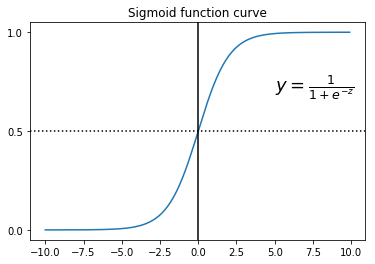

In [153]:

#Sigmoid函数曲线
def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
h = Sigmoid(x)  
plt.plot(x, h)
plt.axvline(0.0, color='K')
plt.axhline(y=0.5, ls='dotted', color='K')
plt.yticks([0.0,  0.5, 1.0])     #  纵坐标
plt.title(r'Sigmoid function curve', fontsize = 12)
plt.text(5,0.7,r'$y = \frac{1}{1+e^{-z}}$', fontsize = 18)
plt.show()

In [154]:
def likelihood_sub(x, y, beta): #最大似然估计似然函数

    return -y * np.dot(beta, x.T) + np.math.log(1 + np.math.exp(np.dot(beta, x.T)))


def likelihood(X, y, beta): #损失函数

    sum = 0
    m, n = np.shape(X)
    for i in range(m):
        sum += likelihood_sub(X[i], y[i], beta)

    return sum


# 梯度下降法
def gradDscent(X, y):  
    
    import matplotlib.pyplot as plt

    h = 0.005          # 学习率
    max_times = 1000  # 迭代次数
    m, n = np.shape(X)
    
    beta = np.zeros(n)  # 参数初始化
    delta_beta = np.ones(n) * h

    llh = 0
    llh_temp = 0

    for i in range(max_times):
        beta_temp = beta

        for j in range(n):
            beta[j] += delta_beta[j]
            llh_tmp = likelihood(X, y, beta)
            delta_beta[j] = -h * (llh_tmp - llh) / delta_beta[j]

        beta = beta_temp + delta_beta
        llh = likelihood(X, y, beta)
        
    return beta


def sigmoid(x, beta): 
    return 1.0 / (1 + np.math.exp(- np.dot(beta, x)))


def predict(X, beta): #预测函数

    m, n = np.shape(X)
    y = np.zeros(m)

    for i in range(m):
        if sigmoid(X[i], beta) > 0.5: y[i] = 1;
    return y
    return beta


beta = gradDscent(X_train, y_train)

# 调用预测函数获得预测值
y_pred = predict(X_test, beta)

m_test = np.shape(X_test)[0]
 #计算混淆矩阵和预测精度
cfmat = np.zeros((2, 2))
num = 0
for i in range(m_test):
    if y_pred[i] == y_test[i] == 0:
        cfmat[0, 0] += 1
        num += 1
    elif y_pred[i] == y_test[i] == 1:
        cfmat[1, 1] += 1
        num += 1
    elif y_pred[i] == 0:
        cfmat[1, 0] += 1
    elif y_pred[i] == 1:
        cfmat[0, 1] += 1

print(cfmat)
rate = num/m_test
print('模型测试集的精度：%.3f'%rate)

[[5. 0.]
 [0. 5.]]
模型测试集的精度：1.000
